1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [1]:
###
#THE KDE is a non parametric way to estimate the probability density function of a random vairable
# It's used to visualize the distribution of a set of data points. 
# WE have to choose  a kerner function (smooth, symmetric and non negative) (usually --> gaussian)
#We center a kernel at each data point in the dataset, then we sum up the contributions of all the kernels
# to create a smooth estimate of the underling probability density function.

C:\Users\eugen\AppData\Local\Temp\ipykernel_11616\1568737976.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.
  ax1.errorbar(bin_centers, counts,yerr=errors, fmt='.k', color='black', ecolor='black', alpha= 0.7)


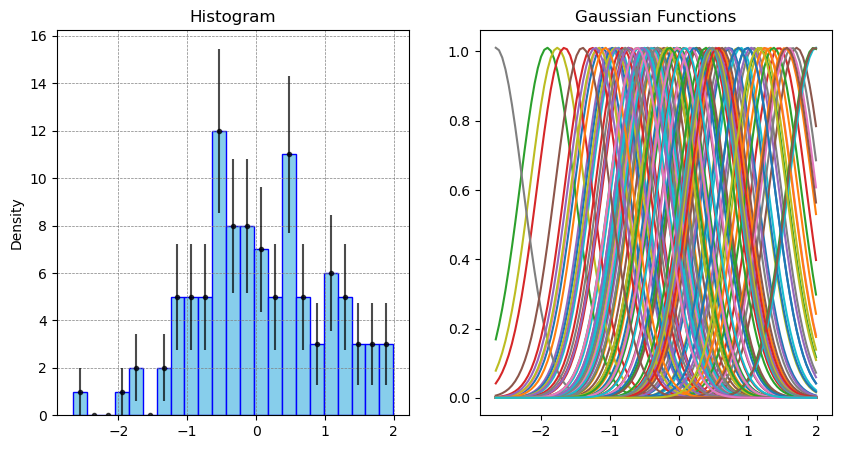

In [37]:
### fatto meglio ?
import matplotlib.pyplot as plt
import numpy as np 
from scipy.stats import norm
from scipy.integrate import trapz
#-------------ax1
N= 100
x= np.random.normal(0,1,N)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5)) # mi fa due subplot in 1 riga e due colonne 
bins= np.linspace(min(x), max(x), 24)
counts, edges, _= ax1.hist(x, bins, color='skyblue', edgecolor='blue', alpha=1)
errors= np.sqrt(counts)
bin_centers= 0.5 * (edges[:-1] + edges[1:])
ax1.errorbar(bin_centers, counts,yerr=errors, fmt='.k', color='black', ecolor='black', alpha= 0.7)
ax1.set_title('Histogram')
ax1.grid(True, color='grey', linestyle='dashed', linewidth=0.5)
ax1.set_ylabel('Density')
ax1.yaxis.set_major_locator(plt.MaxNLocator(integer= True))

#----------ax2
x_values= np.linspace(min(x), max(x), 100)
gaussian_sum= np.zeros_like(x_values)
default_std= 1.06 * x.std() * x.size **(-1/5)

for value in x:
    gaussian=norm.pdf(x_values, loc= value, scale= default_std)
    ax2.plot(x_values, gaussian)
    gaussian_sum += gaussian

ax2.set_title('Gaussian Functions')

plt.show()


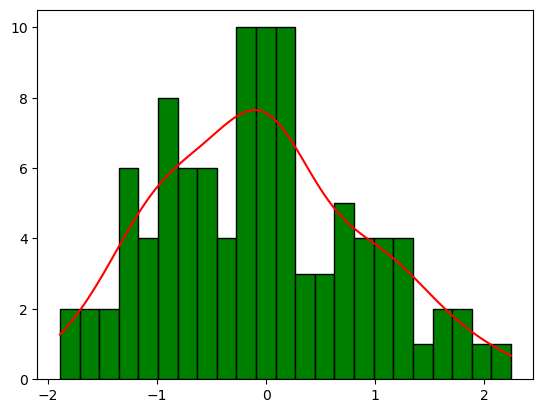

In [3]:
gaussian_area= np.trapz(gaussian_sum, x_values)  # y-> array to integrate, x->
dx= (max(x)-min(x))/(len(bins)-1)
hist_area= 0
for i in counts:
    dy= i*dx
    hist_area += dy
gaussian_sum_normalized= gaussian_sum * hist_area/ gaussian_area
fig, ax= plt.subplots()
ax.plot(x_values, gaussian_sum_normalized, color= 'red')
ax.hist(x, bins, color='green', edgecolor= 'black')
plt.show()

In [4]:
#-------------- Plot the gaussian for each element of x ( nah)
default_std= 1.06 * x.std() * x.size **(-1/5)
sum_gaussians= np.zeros_like(counts)   # Return an array of zeros with the same shape and type as a given array.(counts in this case)
hist_integral=trapz(counts, x=edges[:-1])

for value in x:
    gaussian= norm(loc=value, scale= default_std) # create a gaussian with mean corresponding to the element value and default standard deviation
    x_values= np.linspace(value-4*default_std, value +4 * default_std, len(counts)) # generate x values fo the plot
    sum_gaussians+= gaussian.pdf(x_values)

sum_gaussians *= hist_integral / trapz(sum_gaussians, x = x_values) # normalize the sum to match the integral of the original integral
ax2.plot(x_values, sum_gaussians,'.', color= 'red', alpha= 0.7)

ax2.set_title('Sum of Gaussians')


Text(0.5, 1.0, 'Sum of Gaussians')

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

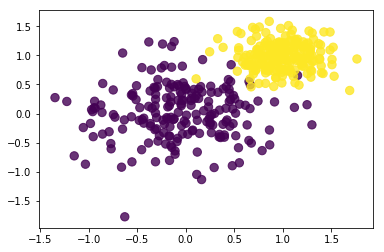

In [5]:

from IPython.display import Image
Image('two_categories_scatter_plot.png')

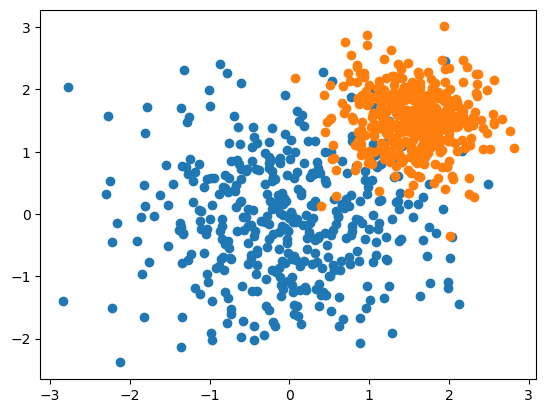

In [6]:
n = 2   # dimesionality of the data points
N = 400  # number of data points generated for each set
x = np.random.normal(loc=0.0, scale=1, size=(N,2))  # creazione di un set di random data points with normal distribution. Loc set the mean of distribution at 0.0, 'scale' set the standard deviation at 1.0, 'N', shape of array
y = np.random.normal(loc=1.5, scale=0.5, size=(N,2))
#no need to choose the colors for plotting on top of each other because python itself can differentiate
#for i in range(n):
plt.scatter(x[:,0],x[:,1],marker='o')  # satter prlot con prima e seconda variabile
plt.scatter(y[:,0],y[:,1],marker='o')

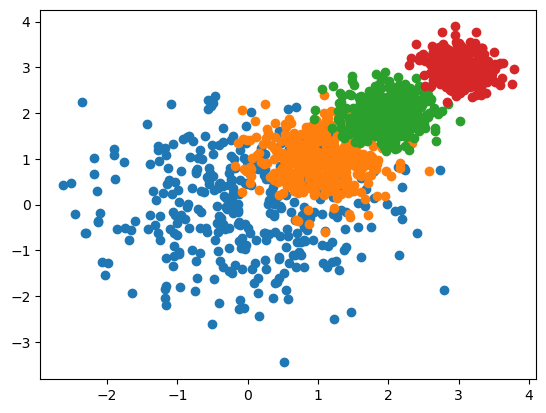

In [7]:
#Generalizing it to n categories
def Gaussian2d(n,N):#scale or std=0.5 for all and mean in steps of 1
    for i in range(n):#n is number of categories
        x=np.random.normal(loc=1*i, scale=1/(i+1), size=(N,2))#just changing the values of mean and std dev
        plt.scatter(x[:,0],x[:,1])
Gaussian2d(4,350)

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [ ]:
import pandas as pd 
import numpy as np
import scipy 
import seaborn as sns

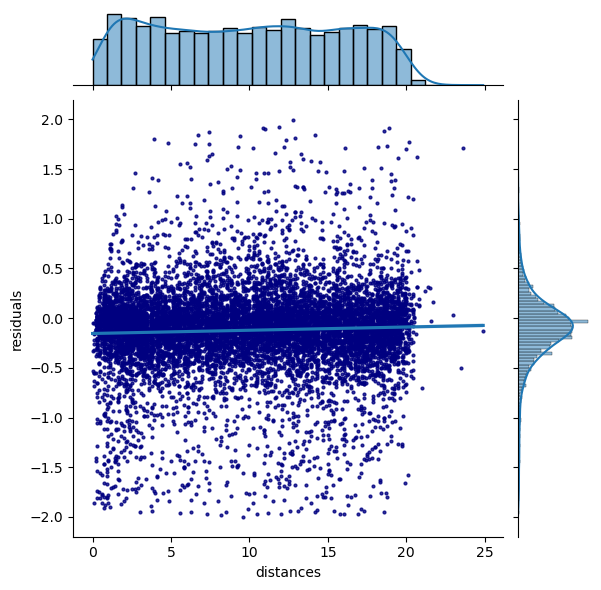

In [15]:
## (g)
import pandas as pd
import scipy 
import seaborn as sns
file= np.load("residuals_261.npy", allow_pickle=True).item()
df=pd.DataFrame(file)
df= df[abs(df['residuals'])<2]

slope, intercept,_, _, _ = scipy.stats.linregress(df['distances'], df['residuals'])
sns.jointplot(data=df, x='distances', y='residuals', kind= 'reg', scatter_kws={'color':'navy','s': 4})


<ErrorbarContainer object of 3 artists>

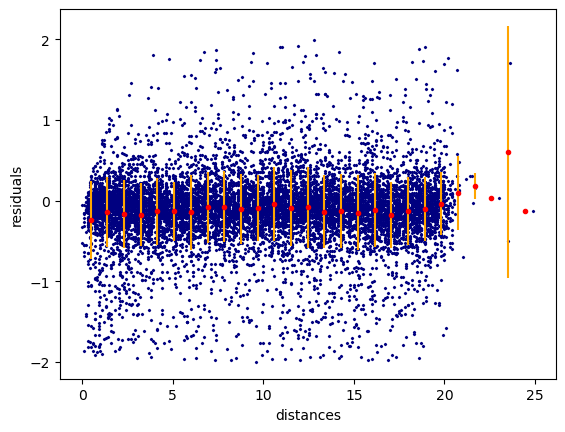

In [38]:
#fill 3 numpy arrays... ecc.
counts, bins= np.histogram(df['distances'], bins= 'auto')
x= ( bins[:-1]+bins[1:])/2  # uguali ai bin centers calcolati in 7.1
y= []
erry=[]
for i in range (len(x)):
    if i < (len(x)-1):
        mask = (df['distances'] >= bins[i]) & (df['distances'] < bins[i + 1])
        residuals_bins= df['residuals'][mask]
        y.append(residuals_bins.mean())
        erry.append(residuals_bins.std())
    if i == (len(x)-1):
        mask= (df['distances'] >=bins[i]) & (df['distances'] <= bins[i+1])
        residuals_bins= df['residuals'][mask]
        y.append(residuals_bins.mean())
        erry.append(residuals_bins.std())
df.plot.scatter(x='distances', y= 'residuals', c='navy', marker='x', s=2)
plt.errorbar(x, y, yerr= erry, color='r',fmt='.', ecolor='orange')



In [10]:
## mio (bah anche no)
import pandas as pd
import numpy as np
M = np.load("residuals_261.npy",allow_pickle=True ).item()
#print(M)
df = pd.DataFrame(M)
df.head()


,residuals,distances
0,1.10,16.0
1,-1.95,6.3
2,-7.20,3.4
3,-4.15,8.4
4,-6.59,1.7


* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2

In [11]:
dfnew = df[np.absolute(df["residuals"]) < 2]#all the values of residuals less than 2 are named as False and thus not included in dataframe
dfnew = dfnew.reset_index(drop=True)
dfnew.head()

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-0.042857,3.3
3,0.128571,5.3
4,0.085714,15.0


* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()`

In [12]:
from scipy.stats import linregress
x = dfnew['residuals']
y = dfnew['distances']
slope, intercept, rval, pval, stderr = linregress(x,y)
print("Slope:",slope)
print("Intercept:",intercept)
print("r_value:",rval)
print("p_value:",pval)
print("Standard err of gradient estimate:",stderr)

Slope: 0.577913366635926
Intercept: 10.025258299436526
r_value: 0.043403510522559086
p_value: 8.717037183576464e-06
Standard err of gradient estimate: 0.1298980963225655


* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot

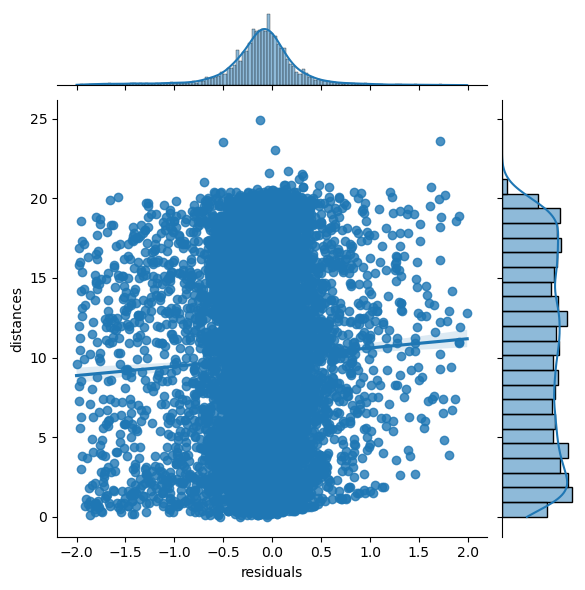

In [13]:
import seaborn as sns
g = sns.jointplot(x="residuals", y="distances", data=dfnew, kind="reg");

* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"

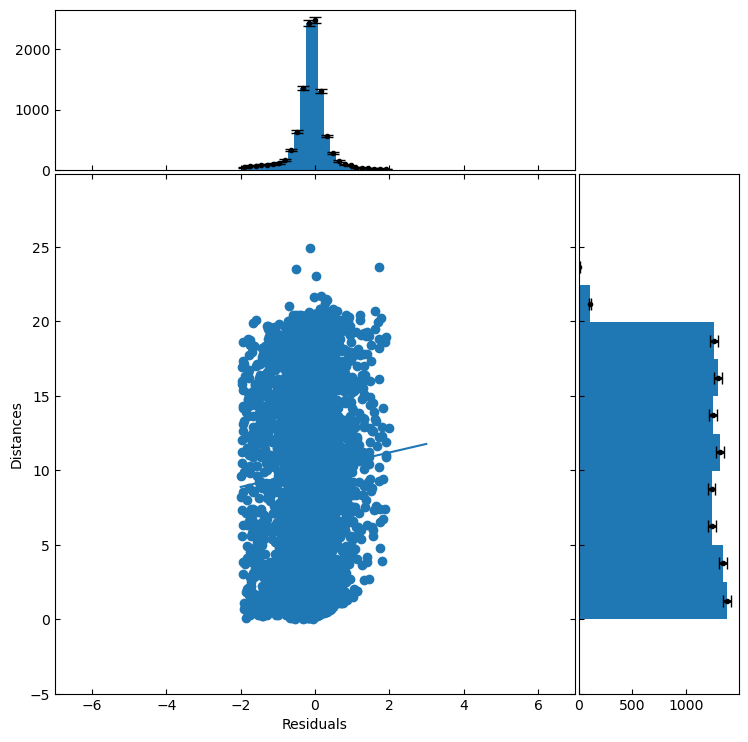

In [14]:
from scipy.stats import linregress
from scipy.stats import norm

x = dfnew['residuals']
y = dfnew['distances']

#performing linear regression using scipy.stats
slope, intercept, rval, pval, stderr = linregress(x,y)

left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(figsize=(8,8))

ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)

# the scatter plot:
ax_scatter.scatter(x, y)

#calculating the rough number of bins required for histogram plot
binx=int(np.sqrt(len(x)))
biny=int(np.sqrt(len(y)))

#setting the limits of scatter plot
ax_scatter.set_xlim((min(x)-5, max(x)+5))
ax_scatter.set_ylim((min(y)-5, max(y)+5))
ax_scatter.set_xlabel("Residuals")
ax_scatter.set_ylabel("Distances")

#simply calculating the length of each bin or binwidth for pleasure
x_endpoints = ax_scatter.get_xlim()
binwidth_x = abs(x_endpoints[1]-x_endpoints[0])/binx
y_endpoints = ax_scatter.get_ylim()
binwidth_y = abs(y_endpoints[1]-y_endpoints[0])/biny

#binslist_X = np.arange(-x_endpoints[0], x_endpoints[1] + binwidth_x, binwidth_x)
#binslist_Y = np.arange(-y_endpoints[0], y_endpoints[1] + binwidth_y, binwidth_y)

#plotting histogram
NBins_x = 25
nx, binEdges_x, patches_x = ax_histx.hist(x, bins=NBins_x)#instead of binx/biny, i have used different number of bins instead.
NBins_y = 10
ny, binEdges_y, patches_y = ax_histy.hist(y, bins=NBins_y, orientation='horizontal')
#plotting error bar on top of histogram
bincenters_x = 0.5*(binEdges_x[1:]+binEdges_x[:-1])#formula to calculate bin center
Std_x = np.sqrt(nx)#error being poisson uncertainity
ax_histx.errorbar(bincenters_x, nx,yerr=Std_x,fmt='.k',elinewidth=2,capsize=4 ); 

bincenters_y = 0.5*(binEdges_y[1:]+binEdges_y[:-1])
Std_y = np.sqrt(ny)#error being poisson uncertainity
#I have just shifted x to y and y to x to get a horizontal error bar and instead wrote xerr instead of yerr to suit my requirements,Boo
ax_histy.errorbar(ny, bincenters_y, xerr=Std_y,fmt='.k',elinewidth=2,capsize=4); 

#setting the limits of histx(top histogram) and histy(left histogram) 
ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())

#Plotting regression line using y=mx+c formula
X = np.linspace(min(x),max(x)+1,100)
Y = (slope*X) + intercept
ax_scatter.plot(X,Y)

plt.show()

#I have not used seaborn to plot a frequency plot histogram with a curve on top because it is poor programming since in this exercise we are not supposed to use sns. 
#Using sns to create a curve on histogram(where we are not supposed to use seaborn) for completing this task is a poor choice.